In [243]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [244]:
# read the csv file or datasets
x_train = pd.read_csv('train_BRCpofr.csv')

In [245]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 5.8+ MB


In [246]:
# to check or counts of unique rows in the gender 
x_train['gender'].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

In [247]:
# replace male with 0 and female with 1 i .e binary 
x_train['gender'].replace({'Male':0,'Female':1},inplace=True)

In [248]:
# check null values
x_train['gender'].isnull().sum()

0

In [249]:
# to check or counts of unique rows in the area also
x_train['area'].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [250]:
x_train['area'].replace({'Urban':0,'Rural':1},inplace=True)

In [251]:
x_train['area'].isnull().sum()

0

In [252]:
x_train['qualification'].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [253]:
# creating dummies using one hot encoding and creating unquie attribute of value with values 0 and 1
OHE = pd.get_dummies(x_train['qualification'])

In [254]:
# concating the new attributes annd droping the parent attribute from dataframe
x_train = pd.concat([x_train,OHE],axis=1).drop(['qualification'],axis=1)

In [255]:
x_train

,id,gender,area,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,Bachelor,High School,Others
0,1,0,0,5L-10L,1,5,5790,More than 1,A,Platinum,64308,1,0,0
1,2,0,1,5L-10L,0,8,5080,More than 1,A,Platinum,515400,0,1,0
2,3,0,0,5L-10L,1,8,2599,More than 1,A,Platinum,64212,1,0,0
3,4,1,1,5L-10L,0,7,0,More than 1,A,Platinum,97920,0,1,0
4,5,0,0,More than 10L,1,6,3508,More than 1,A,Gold,59736,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,1,More than 10L,0,6,0,More than 1,B,Platinum,95736,0,1,0
89388,89389,0,0,5L-10L,1,0,3897,More than 1,A,Platinum,67596,1,0,0
89389,89390,1,0,5L-10L,0,4,3363,More than 1,B,Platinum,114120,1,0,0
89390,89391,1,1,2L-5L,0,8,0,More than 1,B,Platinum,71772,0,1,0


In [256]:
x_train['income'].value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [257]:
OHE = pd.get_dummies(x_train['income'],prefix='income')
x_train = pd.concat([x_train,OHE],axis=1).drop(['income'],axis=1)

In [258]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    89392 non-null  int64 
 1   gender                89392 non-null  int64 
 2   area                  89392 non-null  int64 
 3   marital_status        89392 non-null  int64 
 4   vintage               89392 non-null  int64 
 5   claim_amount          89392 non-null  int64 
 6   num_policies          89392 non-null  object
 7   policy                89392 non-null  object
 8   type_of_policy        89392 non-null  object
 9   cltv                  89392 non-null  int64 
 10  Bachelor              89392 non-null  uint8 
 11  High School           89392 non-null  uint8 
 12  Others                89392 non-null  uint8 
 13  income_2L-5L          89392 non-null  uint8 
 14  income_5L-10L         89392 non-null  uint8 
 15  income_<=2L           89392 non-null

In [259]:
x_train['num_policies'].value_counts()

More than 1    60263
1              29129
Name: num_policies, dtype: int64

In [260]:
x_train['num_policies'].replace({'More than 1':1,'1':0},inplace=True)

In [261]:
x_train

,id,gender,area,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,Bachelor,High School,Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L
0,1,0,0,1,5,5790,1,A,Platinum,64308,1,0,0,0,1,0,0
1,2,0,1,0,8,5080,1,A,Platinum,515400,0,1,0,0,1,0,0
2,3,0,0,1,8,2599,1,A,Platinum,64212,1,0,0,0,1,0,0
3,4,1,1,0,7,0,1,A,Platinum,97920,0,1,0,0,1,0,0
4,5,0,0,1,6,3508,1,A,Gold,59736,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,1,0,6,0,1,B,Platinum,95736,0,1,0,0,0,0,1
89388,89389,0,0,1,0,3897,1,A,Platinum,67596,1,0,0,0,1,0,0
89389,89390,1,0,0,4,3363,1,B,Platinum,114120,1,0,0,0,1,0,0
89390,89391,1,1,0,8,0,1,B,Platinum,71772,0,1,0,1,0,0,0


In [262]:
x_train['type_of_policy'].value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

In [263]:
x_train['type_of_policy'].replace({'Platinum':2,'Silver':0,'Gold':1},inplace=True)

In [264]:
x_train['policy'].value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

In [265]:
x_train['policy'].replace({'A':0,'B':1,'C':2},inplace=True)

In [266]:
# all the arrtibute has int pf float dtype, all the object dtype are converted to int 
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    89392 non-null  int64
 1   gender                89392 non-null  int64
 2   area                  89392 non-null  int64
 3   marital_status        89392 non-null  int64
 4   vintage               89392 non-null  int64
 5   claim_amount          89392 non-null  int64
 6   num_policies          89392 non-null  int64
 7   policy                89392 non-null  int64
 8   type_of_policy        89392 non-null  int64
 9   cltv                  89392 non-null  int64
 10  Bachelor              89392 non-null  uint8
 11  High School           89392 non-null  uint8
 12  Others                89392 non-null  uint8
 13  income_2L-5L          89392 non-null  uint8
 14  income_5L-10L         89392 non-null  uint8
 15  income_<=2L           89392 non-null  uint8
 16  inco

<AxesSubplot:>

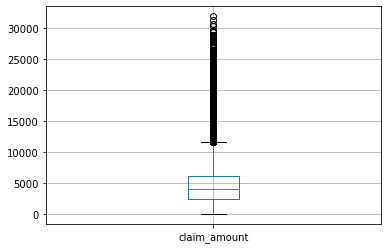

In [267]:
# check null , zeros and outliers 
# check other than catogorical attributes you just converted from object to float
x_train.boxplot(['claim_amount'])

<AxesSubplot:>

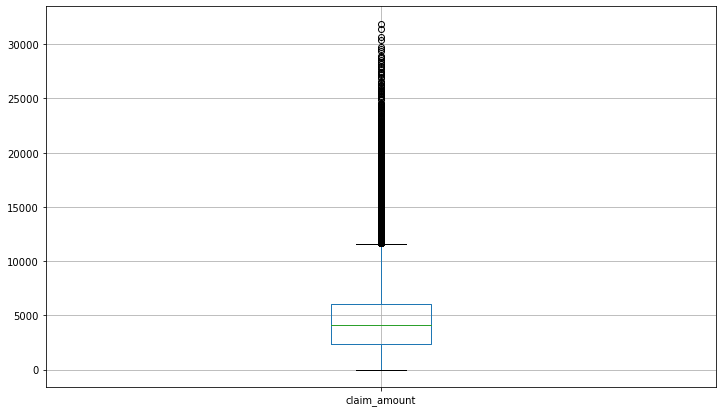

In [268]:
x_train.boxplot(['claim_amount'],figsize=(12,7))

In [269]:
print(x_train['claim_amount'].shape)
print(x_train['claim_amount'][x_train['claim_amount']>=10000].shape)
print((4617/89392)*100)
#total outlier presence is upto 5% so we can replace it with median which has no
#impact of ouliers where mean bears the effect 

(89392,)
(4617,)
5.164891712904958


<AxesSubplot:>

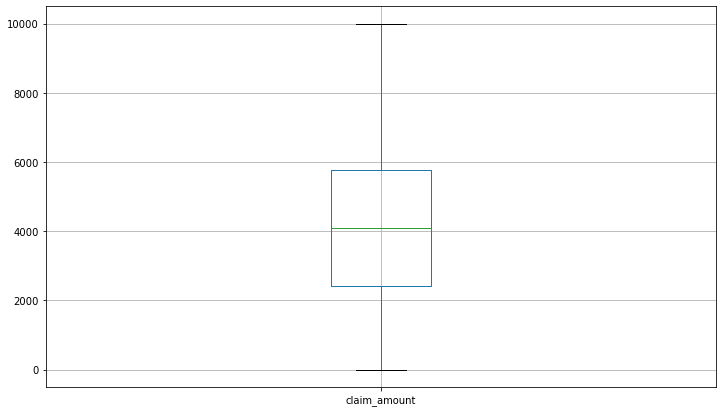

In [270]:
# if you want to remove outliers you can by below method

# x_train['claim_amount'][x_train['claim_amount']==0]=x_train['claim_amount'].median()
x_train['claim_amount'][x_train['claim_amount']>=10000]=x_train['claim_amount'].mean()
x_train.boxplot(['claim_amount'],figsize=(12,7))

<AxesSubplot:>

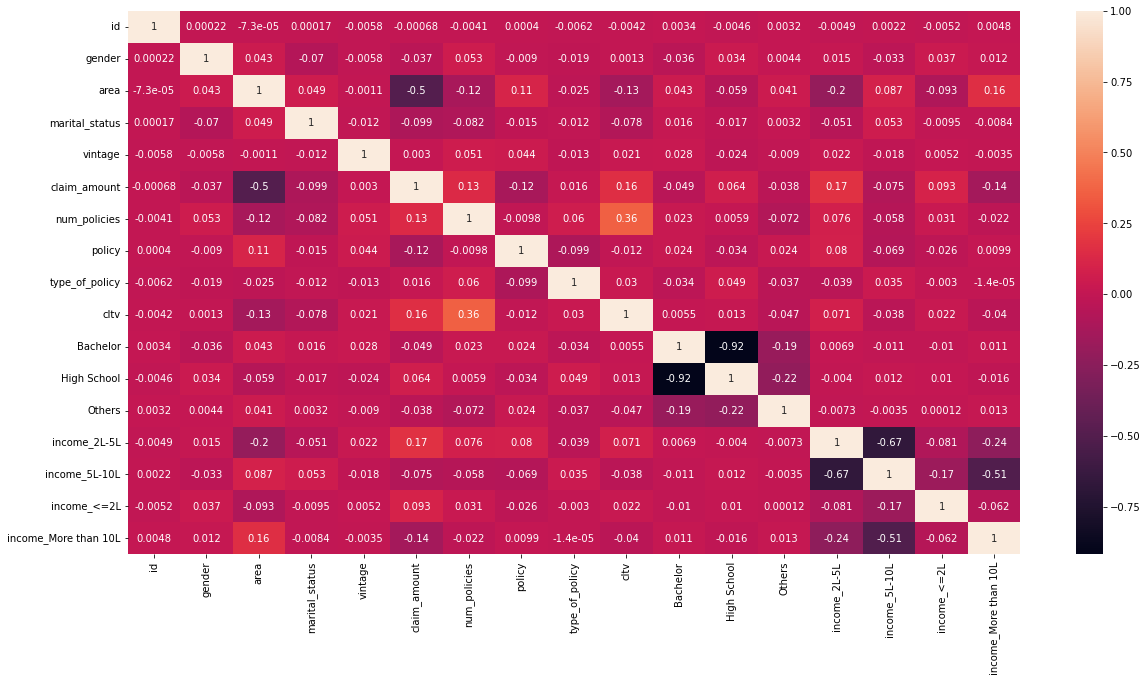

In [271]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),annot=True)

In [272]:
y = x_train['cltv']
x = x_train.drop(['cltv'],axis=1)

In [273]:
y

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [275]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [276]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [277]:
y_pred = lr.predict(x_test)

In [278]:
y_pred

array([123539.77425968,  75402.50469021,  46326.6086865 , ...,
        34462.72538032, 130513.42645482, 138298.77179875])

In [279]:
rsq = r2_score(y_test,y_pred)
rsq

0.14792340815038285

In [280]:
y_test[:5]

58098     67272
46023     30888
52277     58056
84181     30492
75463    263364
Name: cltv, dtype: int64

In [281]:
y_pred[:5]

array([123539.77425968,  75402.50469021,  46326.6086865 ,  37955.92224003,
       123559.40206287])

In [282]:
test = pd.read_csv('test_koRSKBP.csv')
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [283]:
def EDA(x_train):
    import pandas as pd
    x_train['area'].replace({'Urban':0,'Rural':1},inplace=True)
    x_train['gender'].replace({'Male':0,'Female':1},inplace=True)
    x_train['policy'].replace({'A':0,'B':1,'C':2},inplace=True)
    x_train['type_of_policy'].replace({'Platinum':2,'Silver':0,'Gold':1},inplace=True)
    x_train['num_policies'].replace({'More than 1':1,'1':0},inplace=True)
    OHE = pd.get_dummies(x_train['qualification'])
    x_train = pd.concat([x_train,OHE],axis=1).drop(['qualification'],axis=1)
    OHE1 = pd.get_dummies(x_train['income'],prefix='income')
    x_train = pd.concat([x_train,OHE1],axis=1).drop(['income'],axis=1)
    return x_train    

In [284]:
test = EDA(test)

In [285]:
y_pred = lr.predict(test)
y_pred.shape

(59595,)

In [286]:
test['cltv']= y_pred

In [287]:
test

,id,gender,area,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,Bachelor,High School,Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,cltv
0,89393,1,1,0,6,2134,1,1,0,0,1,0,0,1,0,0,109524.939874
1,89394,1,0,0,4,4102,1,0,2,0,1,0,1,0,0,0,128114.921278
2,89395,0,1,1,7,2925,1,1,1,0,1,0,0,1,0,0,108597.871151
3,89396,1,1,1,2,0,1,1,0,1,0,0,0,0,0,1,93508.594860
4,89397,1,0,0,5,14059,1,1,0,0,1,0,1,0,0,0,157709.259168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,0,1,1,6,0,0,0,0,1,0,0,0,1,0,0,32555.633881
59591,148984,0,0,0,6,0,0,2,1,0,1,0,0,1,0,0,49406.527194
59592,148985,1,0,1,4,3323,1,1,2,0,1,0,1,0,0,0,119379.299229
59593,148986,0,1,0,1,2886,1,0,0,1,0,0,0,1,0,0,113765.335660


In [288]:
sample_submission = test[['id','cltv']]
sample_submission.to_csv("sample_submission.csv",index=False)